<a href="https://colab.research.google.com/github/jayu071/Playstore_DateDrigger/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## **Imporating Required Packages**



In [2]:
# Importing libraries
import pandas as pd               # for data manipulation
import numpy as np                # for mathemathical operations and linear algebra
import matplotlib.pyplot as plt   # for data visualization
import seaborn as sns             # for data visualization 
%matplotlib inline

## **Import Playstore Data and User Review Data**

In [3]:
#Google drive mounting

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%load_ext google.colab.data_table

#Read dataset using pandas lib.
playstore_data_path = "/content/drive/MyDrive/Almabetter /CapstoneProject/EDA_DATA/Play Store App Review Analysis/Play Store Data.csv" #path define from Google Drive
user_reviews_path = "/content/drive/MyDrive/Almabetter /CapstoneProject/EDA_DATA/Play Store App Review Analysis/User Reviews.csv"

#load data

playstore_df= pd.read_csv(playstore_data_path)
user_reviews_df= pd.read_csv(user_reviews_path)

#option_2 for load data: 
#playstore_df= pd.read_csv("/content/drive/MyDrive/Almabetter /CapstoneProject/EDA_DATA/Play Store App Review Analysis/Play Store Data.csv")
#user_reviews_df= pd.read_csv("/content/drive/MyDrive/Almabetter /CapstoneProject/EDA_DATA/Play Store App Review Analysis/User Reviews.csv")

## **Load Dataframes For Visual Analysis of Both Data (First 10 and Last 5 Rows Loading)**

In [5]:
playstore_df.head(10) #for Loading first 10 rows of playstore dataframe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [6]:
playstore_df.tail() #tail() function given default 5 last rows in output of playstore dataframe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
user_reviews_df.head(10)  #head(10) function given 10 First rows in output of user_review dataframe

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [8]:
user_reviews_df.tail()  #tail() function given default 5 last rows in output of user_review dataframe

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [9]:
%unload_ext google.colab.data_table

In [10]:
#demo to load data like table with filter 
from google.colab import data_table
data_table.DataTable(playstore_df, include_index=True, num_rows_per_page=10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## **Find Duplicate Data and Remove Duplicates**

In [11]:
print("Shape of playstore_df DataFreame:",playstore_df.shape) #dataframe shape before removing duplicates 
print("Shape of user_reviews_df DataFreame:",user_reviews_df.shape)

Shape of playstore_df DataFreame: (10841, 13)
Shape of user_reviews_df DataFreame: (64295, 5)


In [12]:
print("Duplicate entry in playstore_df data:",len(playstore_df[playstore_df.duplicated()])) #total number of duplicates
print("Duplicate entry in user_reviews_df data:",len(user_reviews_df[user_reviews_df.duplicated()]))

Duplicate entry in playstore_df data: 483
Duplicate entry in user_reviews_df data: 33616


In [13]:
duplicate_playstore = playstore_df[playstore_df.duplicated(keep = 'last') ] #list of all duplicates values

In [14]:
duplicate_playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,ABC News - US & World News,NEWS_AND_MAGAZINES,4.0,18976,35M,"1,000,000+",Free,0,Everyone 10+,News & Magazines,"June 6, 2018",3.19.11,5.0 and up
3788,NBC News,NEWS_AND_MAGAZINES,4.1,63020,Varies with device,"5,000,000+",Free,0,Everyone 10+,News & Magazines,"February 13, 2018",Varies with device,Varies with device
3790,USA TODAY,NEWS_AND_MAGAZINES,4.1,49259,Varies with device,"5,000,000+",Free,0,Everyone 10+,News & Magazines,"August 2, 2018",Varies with device,Varies with device
3792,CNN Breaking US & World News,NEWS_AND_MAGAZINES,4.0,293080,25M,"10,000,000+",Free,0,Everyone 10+,News & Magazines,"August 6, 2018",5.17,4.4 and up


In [15]:
#Remove Duplicates from Main Database
playstore_df1 = playstore_df.drop_duplicates() #remove duplicate and save as new database_df1
playstore_df1.shape #shape after removing duplicates

(10358, 13)

***Details of Each Columns of playstore_df DataFrame***

|Columns_Name|Details_of_Contains|
|------------|-------------------|
|**App**| The app name|
|**Category**|Categorical label, which describes which broad category the app belongs to.|
|**Rating**|Continuous variable with a range from 0.0 to 5.0, which describes the average rating the app has received from the users.|
|**Reviews**|Continuous variable describing the number of reviews that the app received.|
|**Size**|The size of the app. The suffix M is used for megabytes, while the suffix K is used for kilobytes.|
|**Installs**|Categorical label that describes the number of installs.|
|**Type**|Label that indicates whether the app is free or paid.|
|**Price**|The price value for the paid apps.|
|**Content Rating**|Categorical rating that indicates the age group for which the app is suitable.|
|**Genre**| Smicolon-separated list of genres to which the app belongs.|
|**Last Update**|The date the app was last updated.|
|**Current Version**|The current version of the app as specified by the developers.|
|**Android Version**|The Android operating system the app is compatible with.|


In [16]:
duplicate_user_reviews = user_reviews_df[user_reviews_df.duplicated(keep = 'last') ] #list of all duplicates values
duplicate_user_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [17]:
#Remove Duplicates from Main Database
user_reviews_df1 = user_reviews_df.drop_duplicates() #remove duplicate and save as new DataFrame user_reviews_df1
user_reviews_df.shape #shape after removing duplicates

(64295, 5)

**Details of Each Columns of user_reviews_df DataFrame**

|Columns_Name|Details_of_Contains|
|------------|-------------------|
|**App**|The app name.|
|**Translated_Review**|Review text in English.|
|**Sentiment**|Sentiment of the review, which can be positive, neutral, or negative.|
|**Sentiment_Polarity**|Sentiment in numerical form, ranging from -1.00 to 1.00.|
|**Sentiment_Subjectivity**|Measure of the expression of opinions, evaluations, feelings, and speculations|


## **Analysis DataFrame (Coloums Name, Total rows and columns, Data types of columns,Null values)**



In [18]:
#removing unnecessary characters and save as playstore_df2
playstore_df2=playstore_df1.replace('[+,$]','',regex=True)
playstore_df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,January 7 2018,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,January 15 2018,2.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,August 1 2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,June 8 2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,June 20 2018,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,July 25 2017,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,July 6 2018,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,January 20 2017,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17,Books & Reference,January 19 2015,Varies with device,Varies with device


In [19]:
print("Total Rows and Columns in playstore_df2 DataFrame is :",playstore_df2.shape,"\n") #shape function given details of (Rows,Columns)

def playstoreinfo():
    temp_ps = pd.DataFrame(index=playstore_df2.columns)
    temp_ps['DataType'] = playstore_df2.dtypes
    temp_ps["Non-null_Values"] = playstore_df2.count()
    temp_ps['Unique_Values'] = playstore_df2.nunique()
    temp_ps['NaN_Values'] = playstore_df2.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(playstore_df2))*100 
    return temp_ps
playstoreinfo()

Total Rows and Columns in playstore_df2 DataFrame is : (10358, 13) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
App,object,10358,9653,0,0.000000
Category,object,10358,34,0,0.000000
Rating,float64,8893,40,1465,14.143657
Reviews,object,10358,6002,0,0.000000
Size,object,10358,462,0,0.000000
Installs,object,10358,21,0,0.000000
Type,object,10357,3,1,0.009654
Price,object,10358,93,0,0.000000
Content Rating,object,10357,6,1,0.009654
Genres,object,10358,120,0,0.000000


In [20]:
print("Total Rows and Columns in user_reviews_df1 DataFrame is :",user_reviews_df1.shape,"\n") #shape function given details of (Rows,Columns)

def userReviewsinfo():
    temp_ur = pd.DataFrame(index=user_reviews_df1.columns)
    temp_ur['DataType'] = user_reviews_df1.dtypes
    temp_ur["Non-null_Values"] = user_reviews_df1.count()
    temp_ur['Unique_Values'] = user_reviews_df1.nunique()
    temp_ur['NaN_Values'] = user_reviews_df1.isnull().sum()
    temp_ur['NaN_Values_Percentage'] = (temp_ur['NaN_Values']/len(user_reviews_df1))*100 
    return temp_ur
userReviewsinfo()

Total Rows and Columns in user_reviews_df1 DataFrame is : (30679, 5) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
App,object,30679,1074,0,0.000000
Translated_Review,object,29692,27994,987,3.217184
Sentiment,object,29697,3,982,3.200887
Sentiment_Polarity,float64,29697,5410,982,3.200887
Sentiment_Subjectivity,float64,29697,4474,982,3.200887


## **Data Filtering and Each Columns Data Operation**

### **Filtering of User Reviews DataFrame**

In [21]:
#dropped the rows having all null values
user_reviews_df2 = user_reviews_df1.dropna(subset=["Translated_Review"],how="all")
user_reviews_df2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [22]:
user_reviews_df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,29692.000000,29692.000000
mean,0.188868,0.490930
std,0.355694,0.265976
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422917,0.652703
max,1.000000,1.000000


### **App Column Operation**

In [23]:
duplicate_in_app = playstore_df2[playstore_df2.duplicated('App')] #Total apps not match with unique values in app so checking repeted apps and drop repeating entry
duplicate_in_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
285,Quick PDF Scanner OCR FREE,BUSINESS,4.2,80804,Varies with device,5000000,Free,0,Everyone,Business,February 26 2018,Varies with device,4.0.3 and up
293,OfficeSuite : Free Office PDF Editor,BUSINESS,4.3,1002859,35M,100000000,Free,0,Everyone,Business,August 2 2018,9.7.14188,4.1 and up
294,Slack,BUSINESS,4.4,51510,Varies with device,5000000,Free,0,Everyone,Business,August 2 2018,Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0,Everyone,Communication,August 1 2018,Varies with device,Varies with device
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11M,500000000,Free,0,Everyone,Communication,June 8 2018,9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,Solitaire,GAME,4.6,11235,Varies with device,100000,Paid,2.99,Everyone,Card,July 30 2018,Varies with device,Varies with device
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,100000,Free,0,Mature 17,Dating,February 25 2016,2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,1000000,Free,0,Everyone,Communication,July 6 2018,5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,50000,Free,0,Everyone,Medical,March 24 2018,2.1.0.372,4.4 and up


In [24]:
playstore_df3 = playstore_df2.drop_duplicates(subset='App',keep='last') 
pd.DataFrame(playstore_df3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,January 7 2018,1.0.0,4.0.3 and up
2,U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,August 1 2018,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,June 8 2018,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,June 20 2018,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,March 26 2017,1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,July 25 2017,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,July 6 2018,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,January 20 2017,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17,Books & Reference,January 19 2015,Varies with device,Varies with device


### ***Category Column Operation***

In [25]:
#first checking the values in the Category column.
pd.DataFrame(playstore_df3['Category'].value_counts(ascending=True)).head(10)

,Category
1.9,1
BEAUTY,53
COMICS,56
PARENTING,60
ART_AND_DESIGN,61
EVENTS,64
HOUSE_AND_HOME,73
WEATHER,79
ENTERTAINMENT,79
LIBRARIES_AND_DEMO,84


In [26]:
#1.9 look like a outliner so checking data
playstore_df3[playstore_df3['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000,Free,0,Everyone,NaN,February 11 2018,1.0.19,4.0 and up,NaN


In [27]:
#data have entry mistake not matching parameters with other all data so deleting index 10472 from dataframe
#playstore_df3 = playstore_df3.drop(10472)

In [28]:
#by mistake dataentry is wrong,so will shift rows from category column and correct it
from copy import deepcopy
missing_entry = deepcopy(playstore_df3.loc[10472])
missing_entry[1:] = missing_entry[1:].shift(periods=1)
playstore_df3.loc[10472] = missing_entry
# remove the temporary variable
del missing_entry

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


In [29]:
#crosscheck data with google playstore and update category 
playstore_df3.loc[10472, 'Category'] = 'LIFESTYLE'
playstore_df3.loc[10472]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        LIFESTYLE
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                             1000
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                             February 11 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

### **Rating Column Operation**

In [30]:
playstore_df3['Rating'].unique()


array([4.1, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, 4.8, 3.9, 4.9,
       3.6, 3.7, nan, 3.3, 3.4, 3.5, 3.1, 5.0, 2.5, 2.8, 3.0, 2.7, 1.0,
       1.9, 2.9, 2.6, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [31]:
playstore_df3['Rating'].isnull().sum()

1464

In [32]:
x=playstore_df3.Rating.median()
playstore_df3.Rating.fillna(x,inplace=True)
playstore_df3.isnull().sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [33]:
#'1.9' to convert to datatype float64

playstore_df3['Rating'] = playstore_df3['Rating'].astype('float64')
playstore_df3['Rating'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


dtype('float64')

In [34]:
playstore_df3['Rating'].unique()

array([4.1, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 3.9, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.5, 2.8, 3. , 2.7, 1. , 1.9,
       2.9, 2.6, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

### ***Reviews Column Operation***





In [35]:
playstore_df3['Reviews'].unique() #Find Unique Values From Reviews Columns

array(['159', '87510', '215644', ..., '603', '1195', '398307'],
      dtype=object)

In [36]:
playstore_df3['Reviews'] = playstore_df3['Reviews'].astype('int')
playstore_df3['Reviews'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dtype('int64')

In [37]:
playstore_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9653 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9653 non-null   object 
 1   Category        9653 non-null   object 
 2   Rating          9653 non-null   float64
 3   Reviews         9653 non-null   int64  
 4   Size            9653 non-null   object 
 5   Installs        9653 non-null   object 
 6   Type            9652 non-null   object 
 7   Price           9653 non-null   object 
 8   Content Rating  9653 non-null   object 
 9   Genres          9652 non-null   object 
 10  Last Updated    9653 non-null   object 
 11  Current Ver     9645 non-null   object 
 12  Android Ver     9651 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.3+ MB


### ***Installs Column Operation***

In [38]:
playstore_df3['Installs']=playstore_df3['Installs'].astype('int')
playstore_df3['Installs'].isnull().sum()
playstore_df3.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9653 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9653 non-null   object 
 1   Category        9653 non-null   object 
 2   Rating          9653 non-null   float64
 3   Reviews         9653 non-null   int64  
 4   Size            9653 non-null   object 
 5   Installs        9653 non-null   int64  
 6   Type            9652 non-null   object 
 7   Price           9653 non-null   object 
 8   Content Rating  9653 non-null   object 
 9   Genres          9652 non-null   object 
 10  Last Updated    9653 non-null   object 
 11  Current Ver     9645 non-null   object 
 12  Android Ver     9651 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.3+ MB


### ***Type Column Operation***

In [39]:
playstore_df3['Type'].unique() #Find Unique Values From Type Columns

array(['Free', 'Paid', nan], dtype=object)

In [40]:
playstore_df3[playstore_df3.Type.isnull()] #finding NaN data row

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10,Strategy,June 28 2018,Varies with device,Varies with device


In [41]:
playstore_df3.loc[9148, 'Type'] = 'Free'
playstore_df3.loc[9148]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  4.3
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                   Free
Price                                     0
Content Rating                  Everyone 10
Genres                             Strategy
Last Updated                   June 28 2018
Current Ver              Varies with device
Android Ver              Varies with device
Name: 9148, dtype: object

In [42]:
playstore_df3['Type'].unique() #Find Unique Values From Type Columns

array(['Free', 'Paid'], dtype=object)

### ***Size Columns Operation***

In [43]:
playstore_df3['Size'].unique()  #Find Unique Values From Size Columns

array(['19M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M', '28M',
       '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M', '31M',
       '14M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '24M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '8.4M', '118k', '44M', '695k', '1.6M', '18k', '53M',
     

In [44]:
#Convert all size to KB so Each M have to Multiply with 1024
# Removing "M", Changing Size To KB
playstore_df3['Size'] = playstore_df3['Size'].map(
    lambda value :
        str(int(float(value.rstrip('M')) * 1024)) if value[-1] == 'M' else value
)

# Removing "k"
playstore_df3['Size'] = playstore_df3['Size'].map(
    lambda value :
        str(value.rstrip('k')) if value[-1] == 'k' else value
)

# Setting "Varies with device" to NaN
playstore_df3['Size'] = playstore_df3['Size'].map(
    lambda value :
        np.nan if value == 'Varies with device' else value
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [45]:
playstore_df3['Size']=playstore_df3['Size'].astype('float') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
playstore_df3['Size'].replace([np.nan], playstore_df3['Size'].median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [47]:
playstore_df3['Size'].isnull().sum()

0

### ***Price Columns Operation***

In [48]:
playstore_df3['Price'].unique()

array(['0', '4.99', '3.99', '1.49', '2.99', '7.99', '3.49', '1.99',
       '5.99', '6.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '11.99', '79.99', '16.99', '14.99', '1.00', '29.99', '2.49',
       '24.99', '10.99', '1.50', '19.99', '15.99', '33.99', '74.99',
       '39.99', '4.49', '1.70', '8.99', '2.00', '3.88', '25.99', '399.99',
       '17.99', '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50',
       '1.59', '6.49', '1.29', '5.00', '13.99', '299.99', '379.99',
       '37.99', '18.99', '389.99', '19.90', '8.49', '1.75', '14.00',
       '4.85', '46.99', '109.99', '3.95', '154.99', '3.08', '2.59',
       '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04', '12.99',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [49]:
playstore_df3['Price'] = playstore_df3['Price'].astype('float')
playstore_df2['Price'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dtype('O')

### ***Content Rating Column Operation***


In [50]:
playstore_df3['Content Rating'].value_counts()

Everyone          7899
Teen              1035
Mature 17          392
Everyone 10        322
Adults only 18       3
Unrated              2
Name: Content Rating, dtype: int64

In [51]:
playstore_df3[playstore_df3['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7312,Best CG Photography,FAMILY,4.3,1,2560.0,500,Free,0.0,Unrated,Entertainment,June 24 2015,5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.1,1186,6553.0,50000,Free,0.0,Unrated,Tools,February 27 2012,1.3,2.3.3 and up


In [52]:
playstore_df3['Content Rating'].isnull().sum()

0

### ***Android Ver Column Operation***

In [53]:
count_AndroidVer=pd.value_counts(playstore_df3["Android Ver"], sort=True)
count_AndroidVer

4.1 and up            2203
4.0.3 and up          1394
4.0 and up            1286
Varies with device     989
4.4 and up             818
2.3 and up             614
5.0 and up             511
4.2 and up             371
2.3.3 and up           273
2.2 and up             239
3.0 and up             229
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

### **Last Updated Column Operation**

In [54]:
playstore_df3['Last Updated'] = pd.to_datetime(playstore_df3['Last Updated'])
playstore_df3['Last Updated']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       2018-01-07
2       2018-08-01
3       2018-06-08
4       2018-06-20
5       2017-03-26
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9653, dtype: datetime64[ns]

In [55]:
playstore_df3['LastUpdated_Day']=playstore_df3['Last Updated'].dt.day
playstore_df3['LastUpdated_Month']=playstore_df3['Last Updated'].dt.month
playstore_df3['LastUpdated_Year']=playstore_df3['Last Updated'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [56]:
playstore_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9653 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   App                9653 non-null   object        
 1   Category           9653 non-null   object        
 2   Rating             9653 non-null   float64       
 3   Reviews            9653 non-null   int64         
 4   Size               9653 non-null   float64       
 5   Installs           9653 non-null   int64         
 6   Type               9653 non-null   object        
 7   Price              9653 non-null   float64       
 8   Content Rating     9653 non-null   object        
 9   Genres             9652 non-null   object        
 10  Last Updated       9653 non-null   datetime64[ns]
 11  Current Ver        9645 non-null   object        
 12  Android Ver        9651 non-null   object        
 13  LastUpdated_Day    9653 non-null   int64         
 14  LastUpd

## ***Seperate Numerical And Categorical Data*** 

In [57]:
num_dataf=[col for col in playstore_df3.columns if playstore_df3[col].dtype!='O']
num_dataf

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Last Updated',
 'LastUpdated_Day',
 'LastUpdated_Month',
 'LastUpdated_Year']

In [58]:
num_data=playstore_df3[num_dataf]
num_data

,Rating,Reviews,Size,Installs,Price,Last Updated,LastUpdated_Day,LastUpdated_Month,LastUpdated_Year
0,4.1,159,19456.0,10000,0.0,2018-01-07,7,1,2018
2,4.7,87510,8908.0,5000000,0.0,2018-08-01,1,8,2018
3,4.5,215644,25600.0,50000000,0.0,2018-06-08,8,6,2018
4,4.3,967,2867.0,100000,0.0,2018-06-20,20,6,2018
5,4.4,167,5734.0,50000,0.0,2017-03-26,26,3,2017
...,...,...,...,...,...,...,...,...,...
10836,4.5,38,54272.0,5000,0.0,2017-07-25,25,7,2017
10837,5.0,4,3686.0,100,0.0,2018-07-06,6,7,2018
10838,4.3,3,9728.0,1000,0.0,2017-01-20,20,1,2017
10839,4.5,114,12288.0,1000,0.0,2015-01-19,19,1,2015


In [59]:
#For categorical Data
cat_dataf=[col for col in playstore_df3.columns if playstore_df3[col].dtype=='O']
cat_dataf

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

##**EDA OF Playstore Data**

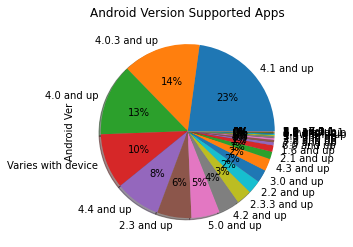

In [60]:
count_AndroidVer.plot(kind = 'pie',  autopct='%1.0f%%', shadow=True)
plt.title('Android Version Supported Apps')
plt.show()

**Summary-1:** After identify total distibutation percentage on data,given details of more app supported Android OS versions.Basically android 4.0 and above version suppoeted app ratio is very higher and more then 60% app's support only on android 4.0 and above version

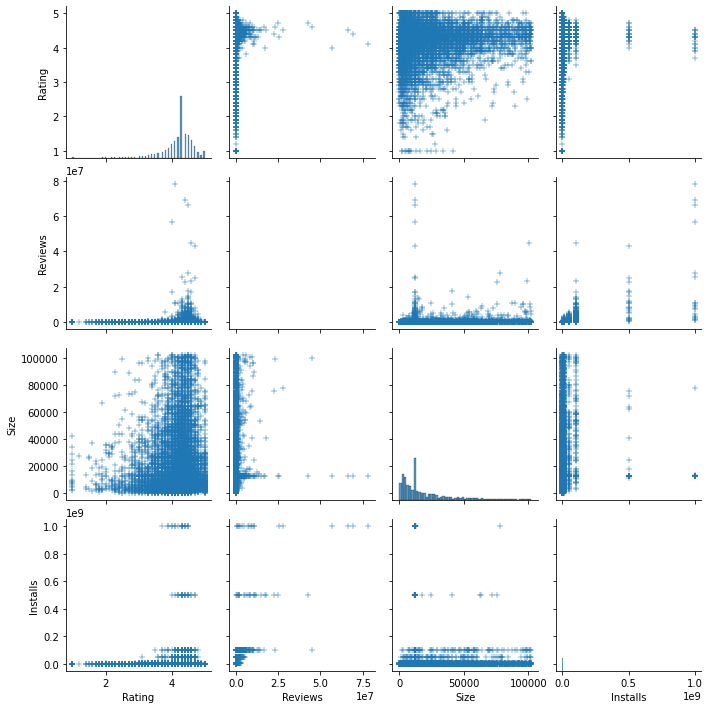

In [61]:
df2=playstore_df3.loc[:,["Rating","Reviews","Size","Installs"]]
g = sns.pairplot(df2, markers='+')
plt.show(g)

**Summary-2:**

|index|Chart |Details|
|-----|------|-------|
|A)|Installs vs Rating 📈| Rating 4 and above apps are more install then any other rating!|
|B)|Size vs Rating 📈| Mostly larger size app's are rated and near 4 rate!|
|C)|Size vs Installs 📈|only fews larger size app installtion ratio is very then small size apps!|

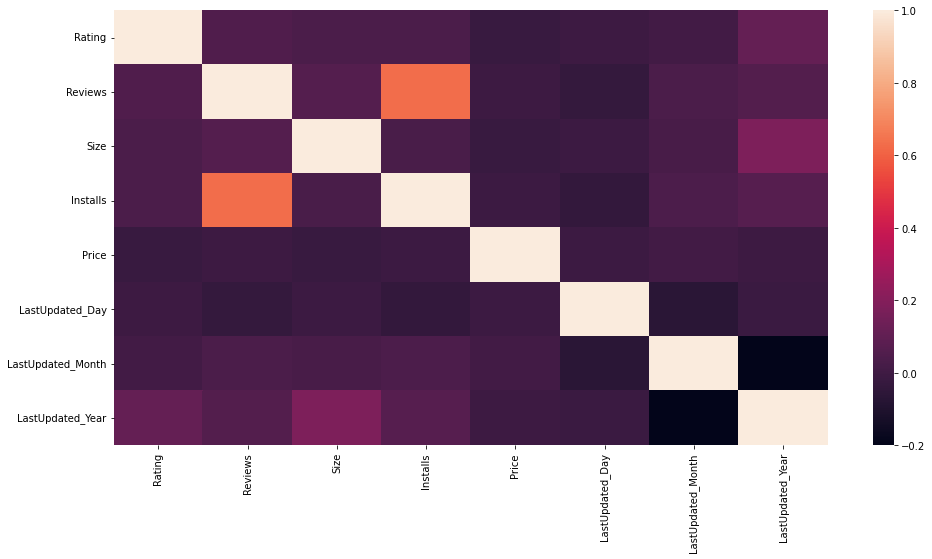

In [68]:
plt.figure(figsize=(16,8))
corr= num_data.corr()
sns.heatmap(corr)
plt.show()

In [69]:
y = playstore_df3['Category'].value_counts().index
x = playstore_df3['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

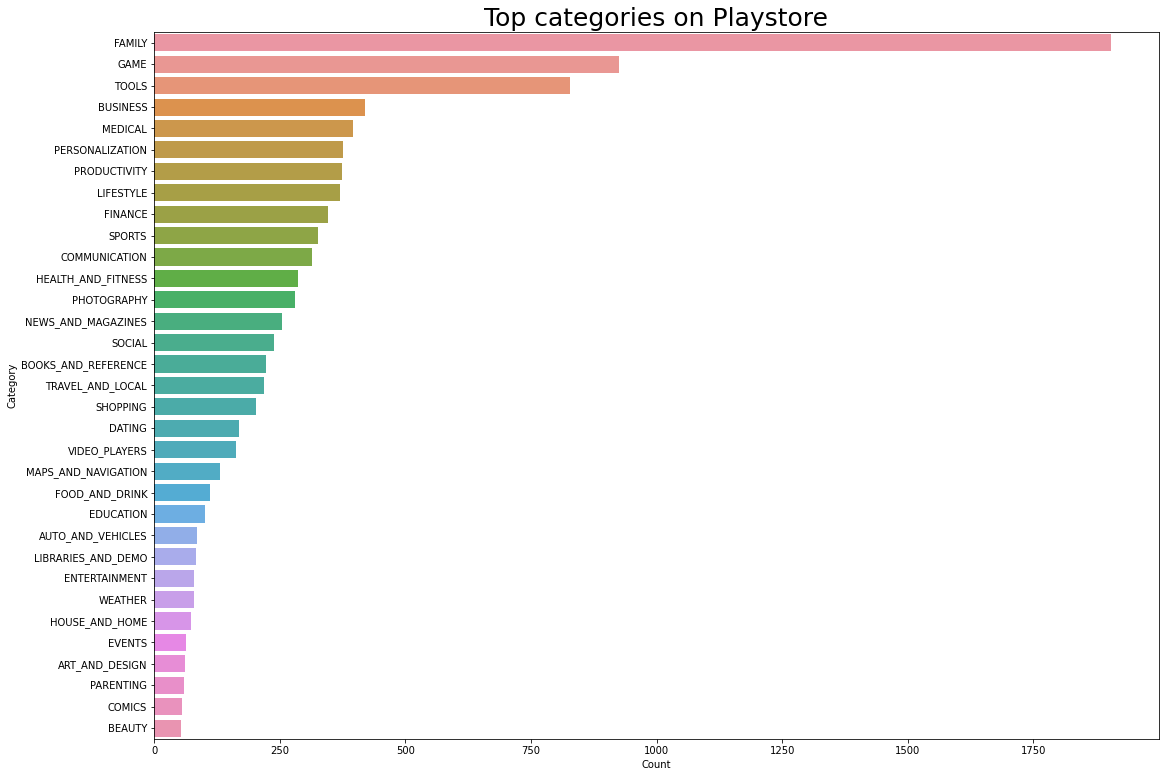

In [71]:
plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis,)
graph.set_title("Top categories on Playstore", fontsize = 20);

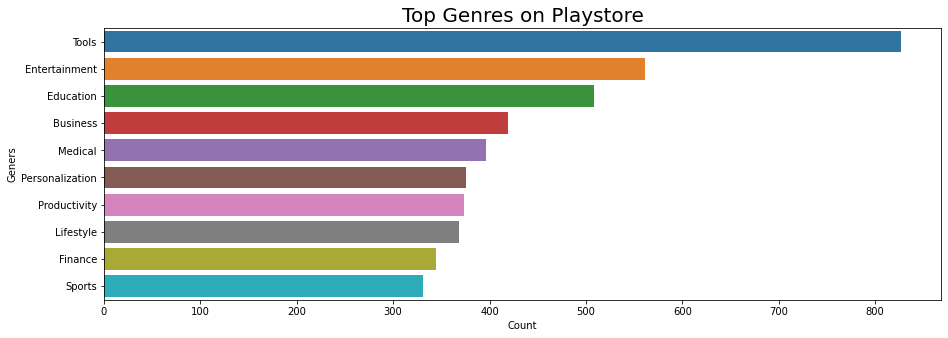

In [82]:
y = playstore_df3['Genres'].value_counts().index
x = playstore_df3['Genres'].value_counts().head(10)
xsisG = []
ysisG = []
for i in range(len(x)):
    xsisG.append(x[i])
    ysisG.append(y[i])

plt.figure(figsize=(15,5))
plt.xlabel("Count")
plt.ylabel("Geners")

graph = sns.barplot(x = xsisG, y = ysisG,)
graph.set_title("Top Genres on Playstore", fontsize = 20);

In [65]:
genres_vs_installs = playstore_df3.groupby(['Genres'])[['Installs']].sum()
genres_vs_installs

,Installs
Genres,
Action,3483039190
Action;Action & Adventure,53020500
Adventure,296695320
Adventure;Action & Adventure,106150000
Adventure;Brain Games,100000
...,...
Trivia;Education,100
Video Players & Editors,3917002720
Video Players & Editors;Music & Video,15000000


In [67]:
plot.genres_vs_installs()

NameError: ignored

In [ ]:
#top 10 Paid Apps

x=playstore_df2[playstore_df2["Type"]=="Paid"]
y=x.groupby("App").Installs.sum().sort_values(ascending=False).head(10)
sns.barplot(y.values,y.index)

In [ ]:
#top 10 Free Apps

x=playstore_df2[playstore_df2["Type"]=="Free"]
y=x.groupby("App").Installs.sum().sort_values(ascending=False).head(10)
sns.barplot(y.values,y.index)

In [ ]:
x=playstore_df.Type.value_counts()
label=["Paid","Free","NaN"]
plt.pie(x,labels=label,autopct="%1.2f%%",shadow=True)
plt.show()

In [ ]:

sns.countplot(x='Content Rating',data=playstore_df2)
plt.xticks(rotation=70)

In [ ]:
boolean = playstore_df2.duplicated(subset=['App']).any()
boolean

In [ ]:
duplicate_in_app = playstore_df2[playstore_df2.duplicated('App')] #Total apps not match with unique values in app so checking repeted apps and drop repeating entry
duplicate_in_app

In [ ]:
playstore_df3 = playstore_df2.drop_duplicates(subset='App',keep='last') 
playstore_df3.info()